## Key Indicators of Heart Disease
### 2020 annual CDC survey data of 400k adults related to their health status

#### What topic does the dataset cover?

According to the [CDC](https://www.cdc.gov/heartdisease/risk_factors.htm), heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

#### Where did the dataset come from and what treatments did it undergo?

Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, I noticed many different factors (questions) that directly or indirectly influence heart disease, so I decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects.

[Dataset link on Kaggle](https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease)

### Project Motivation

As we all striving for a long healthy life, this analysis aims to identify key risk factors of heart disease which is still one of the most common reasons for sudden and unexpected pass aways in Western countries. I am particularly interested by how a healthy lifestyle can avoid the probability of a heart disease.


### Explanation of Features

|Feature|Description|
|:--|:--|
|HeartDisease|Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)|
| BMI  | Body Mass Index (BMI)  |
| Smoking  |  Have you smoked at least 100 cigarettes in your entire life?|
|AlcoholDrinking|Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week|
|Stroke|(Ever told) (you had) a stroke?|
|PhysicalHealth|Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 |
|MentalHealth|Thinking about your mental health, for how many days during the past 30 days was your mental health not good? |
|DiffWalking|Do you have serious difficulty walking or climbing stairs?|
|Sex|Are you male or female?|
|AgeCategory|Fourteen-level age category|
|Race|Imputed race/ethnicity value|
|Diabetic|(Ever told) (you had) diabetes?|
|PhysicalActivity|Adults who reported doing physical activity or exercise during the past 30 days other than their regular job|
|GenHealth|Would you say that in general your health is...|
|SleepTime|On average, how many hours of sleep do you get in a 24-hour period?|
|Asthma|(Ever told) (you had) asthma?|
|KidneyDisease|Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?|
|SkinCancer|(Ever told) (you had) skin cancer?|

In [281]:
import pandas as pd
df = pd.read_csv('heart_disease_data.zip')

In [282]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

As we can see above there are no problem with Null values. Next step changing categorical variable to numerical.

In [284]:
# import LabelEncoder from sklearn.preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [285]:
list_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex','AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [286]:
for cols in list_cols:
    df[cols + '_Code'] = le.fit_transform(df[cols])

In [287]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,DiffWalking_Code,Sex_Code,AgeCategory_Code,Race_Code,Diabetic_Code,PhysicalActivity_Code,GenHealth_Code,Asthma_Code,KidneyDisease_Code,SkinCancer_Code
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,0,0,7,5,2,1,4,1,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,0,0,12,5,0,1,4,0,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,0,1,9,5,2,1,1,1,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,0,0,11,5,0,0,2,0,0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,1,0,4,5,0,1,4,0,0,0


In [288]:
# check label enocoder + check amount of people in the dataset experiencing a heart disease
df.groupby(['HeartDisease','HeartDisease_Code']).size()/df.shape[0]

HeartDisease  HeartDisease_Code
No            0                    0.914405
Yes           1                    0.085595
dtype: float64

As we can see above, based on our dataset 8.5% have experienced a heart disease.

In [289]:
import numpy as np
# create new column BMI_Code to classify bmi in 3 categories, please condsider that super heavy people + super light people are categorized as 3 as both seem to be unhealthy
df['BMI_Code'] = df.BMI.apply(lambda x: 1 if np.logical_and(x >= 18.5, x<= 24.9) else 2 if np.logical_and(x>24.9, x<= 29.9) else 3)

In [290]:
df.BMI_Code.value_counts()

2    114752
3    109905
1     95138
Name: BMI_Code, dtype: int64

In [291]:
# check proportion of people in category 3 with small body weight
df[(df.BMI_Code == 3) & (df.BMI_Code < 18.5)].BMI_Code.count()/df[(df.BMI_Code == 3)].BMI_Code.count()

1.0

(array([0.11613607, 0.00426565, 0.00391501, 0.00901661]),
 array([ 0. ,  7.5, 15. , 22.5, 30. ]),
 <a list of 4 Patch objects>)

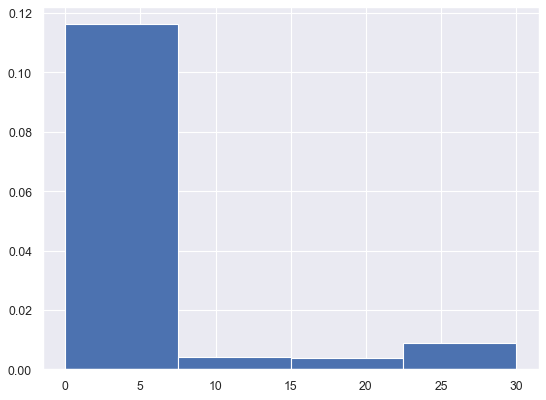

In [327]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.hist(df.PhysicalHealth, density=True, bins=4)  # density=False would make counts

In [328]:
# cut cols PhysicalHealth and MentalHealth in 4 
for col in ['PhysicalHealth','MentalHealth']:
    df[col + '_Code'] = pd.cut(df[col], 4)

In [329]:
df.MentalHealth_Code.value_counts()

(-0.03, 7.5]    268219
(7.5, 15.0]      24704
(22.5, 30.0]     20479
(15.0, 22.5]      6393
Name: MentalHealth_Code, dtype: int64

In [330]:
df.MentalHealth_Code = le.fit_transform(df.MentalHealth_Code)

In [331]:
df.MentalHealth_Code.value_counts()

0    268219
1     24704
3     20479
2      6393
Name: MentalHealth_Code, dtype: int64

In [332]:
df.PhysicalHealth_Code.value_counts()

(-0.03, 7.5]    278548
(22.5, 30.0]     21626
(7.5, 15.0]      15243
(15.0, 22.5]      4378
Name: PhysicalHealth_Code, dtype: int64

In [333]:
df.PhysicalHealth_Code = le.fit_transform(df.PhysicalHealth_Code)

In [334]:
df.PhysicalHealth_Code.value_counts()

0    278548
3     21626
1     15243
2      4378
Name: PhysicalHealth_Code, dtype: int64

(array([5.27435715e-02, 1.20626189e-01, 4.82918065e-04, 6.03647581e-05]),
 array([ 1.  ,  6.75, 12.5 , 18.25, 24.  ]),
 <a list of 4 Patch objects>)

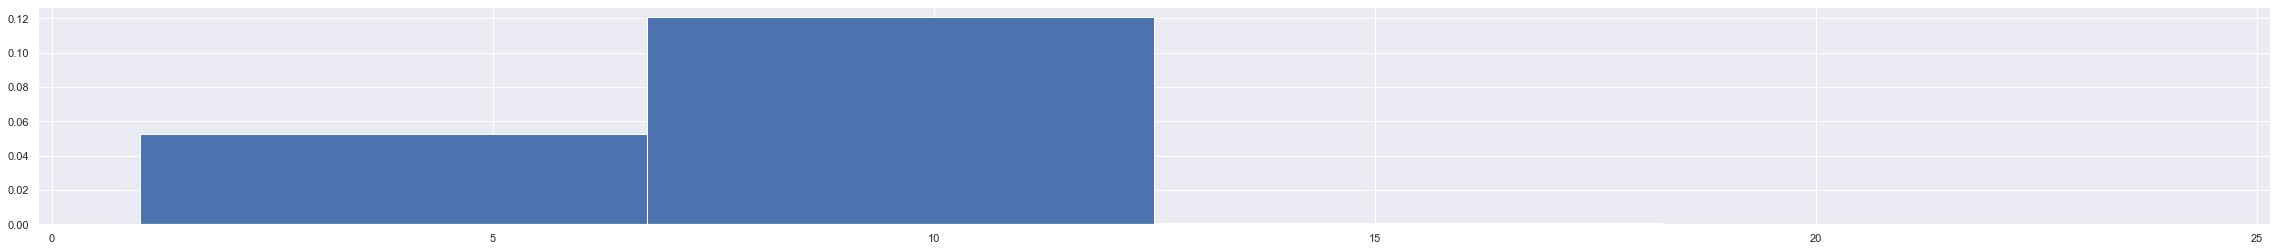

In [335]:
plt.hist(df.SleepTime, density=True, bins=4)  # density=False would make counts

In [336]:
# considering 6-10 hours as normal sleeping time
df['SleepTime_Code'] = df['SleepTime'].apply(lambda x: 0 if np.logical_and(x>= 6, x<= 10) else 1)

In [337]:
df['SleepTime_Code'].value_counts()

0    285911
1     33884
Name: SleepTime_Code, dtype: int64

(array([0.23336283, 0.34189311, 0.34137197, 0.0833721 ]),
 array([ 6.,  7.,  8.,  9., 10.]),
 <a list of 4 Patch objects>)

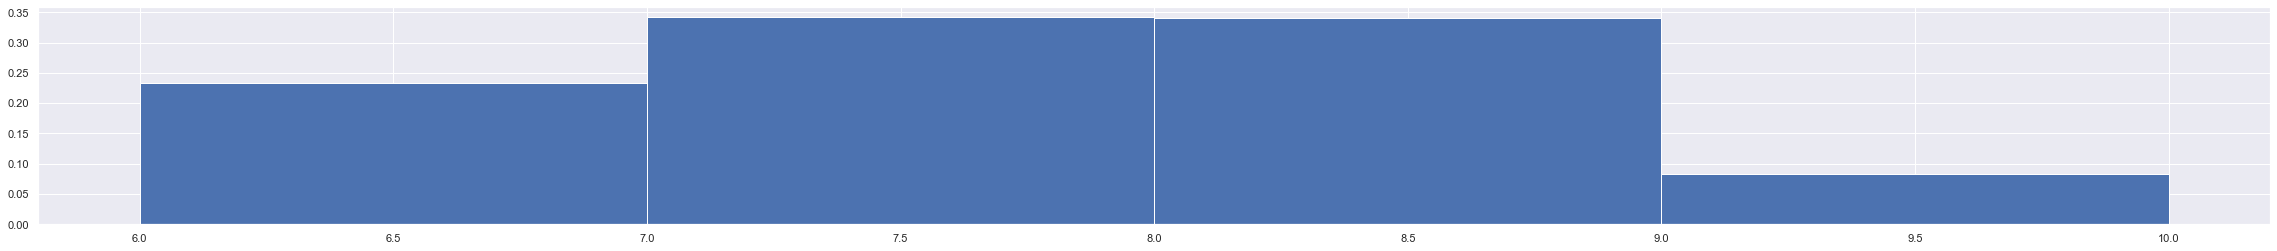

In [338]:
# check distribution of healthy sleepers
plt.hist(df[df.SleepTime_Code == 0].SleepTime, density=True, bins=4)

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_correlation(column_name, df, width, cond = None):
    """
        This function takes a the column name, the dataset and the width of chart as an input.
        It helps us visualize the correlation between the given feature and the 'HeartDisease'.
        The output is the correlation table and a bar chart for better visualization.
    """
    if cond is not None:
     df = df[cond]
    data = df[[column_name, 'HeartDisease_Code']].groupby([column_name]).mean().sort_values(['HeartDisease_Code'], ascending=False).reset_index()
    print(data)
    fig = sns.barplot(x=column_name, y="HeartDisease_Code", data=data)
    sns.set(rc={"figure.figsize":(width, 4)})
    plt.ylabel("Probability of a Heart Disease")
    plt.show()

    AgeCategory  HeartDisease_Code
0   80 or older           0.225603
1         75-79           0.188483
2         70-74           0.156028
3         65-69           0.120084
4         60-64           0.098765
5         55-59           0.073999
6         50-54           0.054487
7         45-49           0.034143
8         40-44           0.023136
9         35-39           0.014404
10        30-34           0.012051
11        25-29           0.007844
12        18-24           0.006172


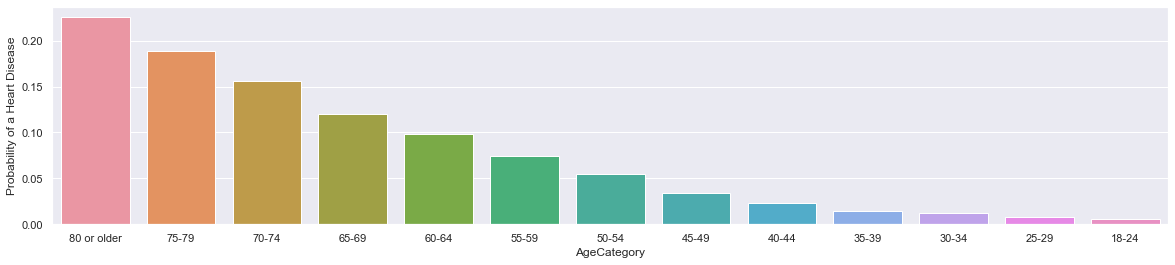

In [342]:
visualize_correlation('AgeCategory', df, 10)

   BMI_Code  HeartDisease_Code
0         3           0.219481
1         2           0.189890
2         1           0.154556


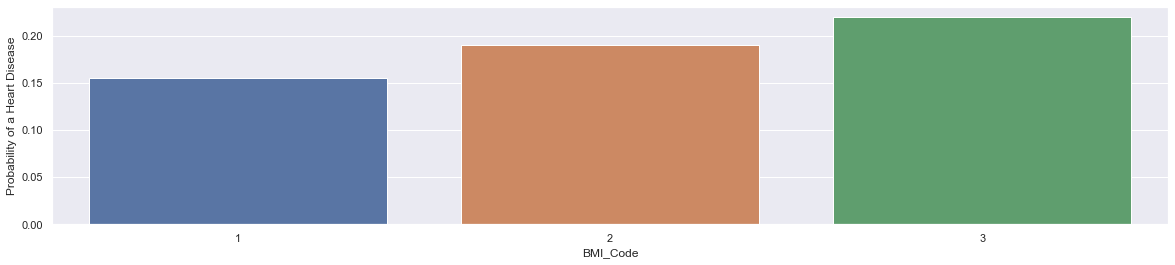

In [306]:
visualize_correlation('BMI_Code', df, 20, df['AgeCategory'].isin(['80 or older', '75-79', '70-74']))

In [307]:
df.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

  Smoking  HeartDisease_Code
0     Yes           0.225184
1      No           0.152912


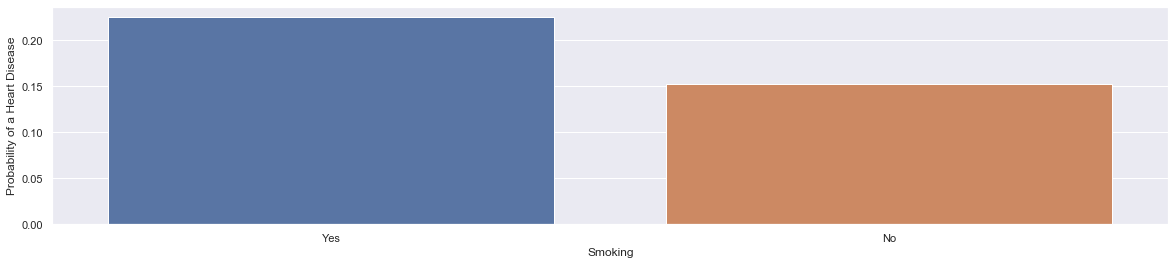

In [308]:
visualize_correlation('Smoking', df, 20, df['AgeCategory'].isin(['80 or older', '75-79', '70-74']))

   PhysicalHealth_Code  HeartDisease_Code
0                    3           0.338748
1                    2           0.296684
2                    1           0.270752
3                    0           0.163066


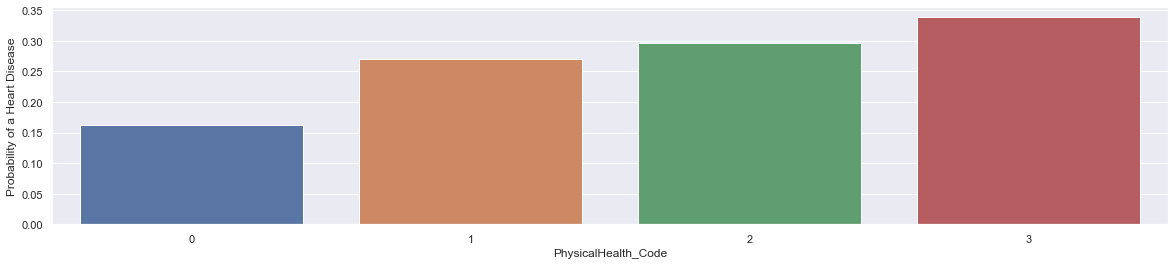

In [309]:
visualize_correlation('PhysicalHealth_Code', df, 20, df['AgeCategory'].isin(['80 or older', '75-79', '70-74']))

                  Diabetic  HeartDisease_Code
0                      Yes           0.330849
1  No, borderline diabetes           0.209841
2                       No           0.202029
3   Yes (during pregnancy)           0.141509


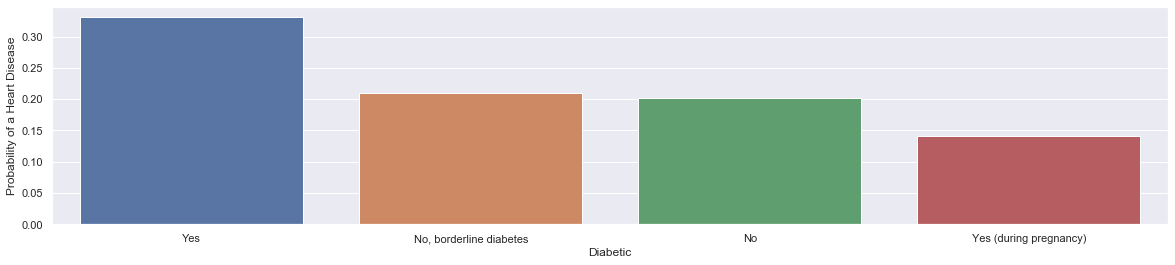

In [310]:
visualize_correlation('Diabetic', df, 20, df['AgeCategory'] == '80 or older')

   SleepTime_Code  HeartDisease_Code
0               1            0.28891
1               0            0.21943


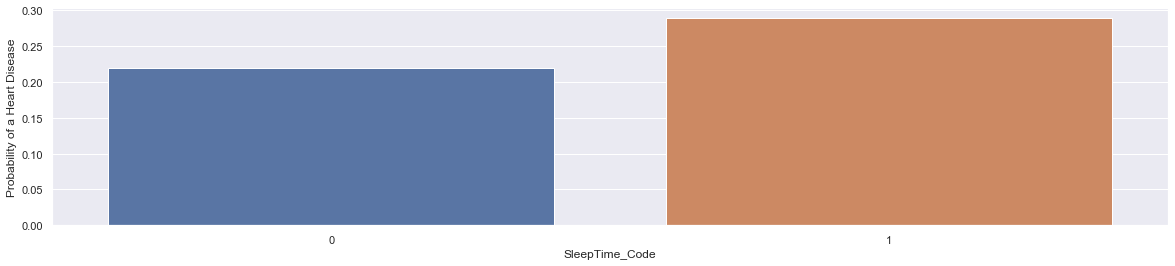

In [311]:
visualize_correlation('SleepTime_Code', df, 20, df['AgeCategory'] == '80 or older')

In [312]:
df_c = df.copy()

In [313]:
df_c = df_c.filter(regex='_Code')
df_c.columns = df_c.columns.str.replace("_Code", "")


In [314]:
df_c

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,1,0,0,0,0,7,5,2,1,4,1,0,1,3,0,3,1
1,0,0,0,1,0,0,12,5,0,1,4,0,0,0,1,0,0,0
2,0,1,0,0,0,1,9,5,2,1,1,1,0,0,2,2,3,0
3,0,0,0,0,0,0,11,5,0,0,2,0,0,1,1,0,0,0
4,0,0,0,0,1,0,4,5,0,1,4,0,0,0,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,8,3,2,0,1,1,0,0,2,0,0,0
319791,0,1,0,0,0,1,3,3,0,1,4,1,0,0,2,0,0,1
319792,0,0,0,0,0,0,5,3,0,1,2,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,1,3,0,0,2,0,0,0,3,0,0,1


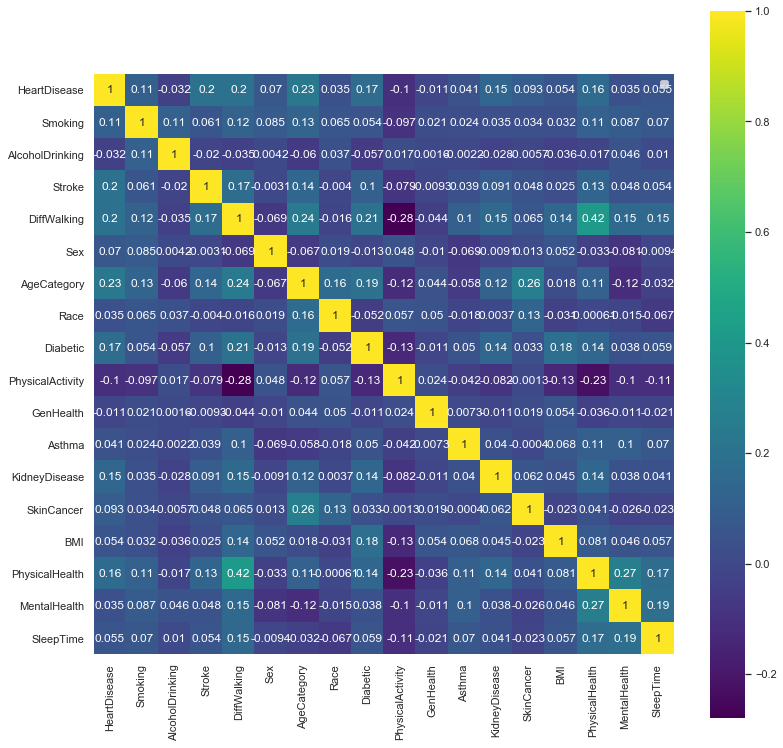

In [315]:
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.legend('Pearson Coefficient for Data')
sns.heatmap(df_c.corr(), cmap=colormap,annot=True, square=True,linecolor='white')

In [316]:
df[df['AgeCategory'].isin(['80 or older', '75-79', '70-74']) & (df['Smoking'] == 'Yes') & (df['PhysicalHealth_Code'] == 3)\
  & (df['Diabetic'] == 'Yes') ].HeartDisease_Code.mean()

0.4767353165522502

In [317]:
df[df['AgeCategory'].isin(['80 or older', '75-79', '70-74']) & (df['Smoking'] == 'Yes') & (df['PhysicalHealth_Code'] == 3)\
  & (df['Diabetic'] == 'Yes') ].shape[0]

1311

In [318]:
unhealthy_p = df[df['AgeCategory'].isin(['80 or older', '75-79', '70-74']) & (df['Smoking'] == 'Yes') & (df['PhysicalHealth_Code'] == 3)\
  & (df['Diabetic'] == 'Yes') & (df['BMI_Code'] == 3) & (df['SleepTime_Code'] == 1)].HeartDisease_Code.mean()
unhealthy_s = df[df['AgeCategory'].isin(['80 or older', '75-79', '70-74']) & (df['Smoking'] == 'Yes') & (df['PhysicalHealth_Code'] == 3)\
  & (df['Diabetic'] == 'Yes') & (df['SleepTime_Code'] == 1) & (df['BMI_Code'] == 3) & (df['SleepTime_Code'] == 1)].shape[0]

In [319]:
healthy_p = df[df['AgeCategory'].isin(['80 or older', '75-79', '70-74']) & (df['Smoking'] == 'No') & (df['PhysicalHealth_Code'] == 0)\
  & (df['Diabetic'] != 'Yes') & (df['BMI_Code'] == 1) & (df['SleepTime_Code'] == 0)].HeartDisease_Code.mean()
healthy_s =df[df['AgeCategory'].isin(['80 or older', '75-79', '70-74']) & (df['Smoking'] == 'No') & (df['PhysicalHealth_Code'] == 0)\
  & (df['Diabetic'] != 'Yes') & (df['SleepTime_Code'] == 0) & (df['BMI_Code'] == 1) & (df['SleepTime_Code'] == 0)].shape[0]

In [320]:
average_p = df[df['AgeCategory'].isin(['80 or older', '75-79', '70-74'])].HeartDisease_Code.mean()
average_s = df[df['AgeCategory'].isin(['80 or older', '75-79', '70-74'])].shape[0]

In [321]:
d = {'cat': ['unhealthy', 'average', 'healthy'], 'HeartDisease_prob': [unhealthy_p, average_p, healthy_p], 'sample_size': [unhealthy_s, average_s, healthy_s]}

df_comp = pd.DataFrame(data=d)

Text(0.5, 0, 'category')

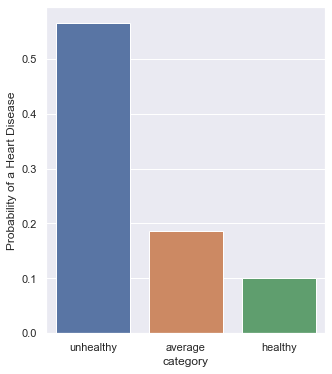

In [357]:
sns.set(rc={"figure.figsize":(5, 6)})
sns.barplot(x='cat', y="HeartDisease_prob", data=df_comp)
plt.ylabel("Probability of a Heart Disease")
plt.xlabel("category")

         cat  HeartDisease_prob  sample_size
0  unhealthy           0.566265          166
1    average           0.187027        76700
2    healthy           0.100418        10038


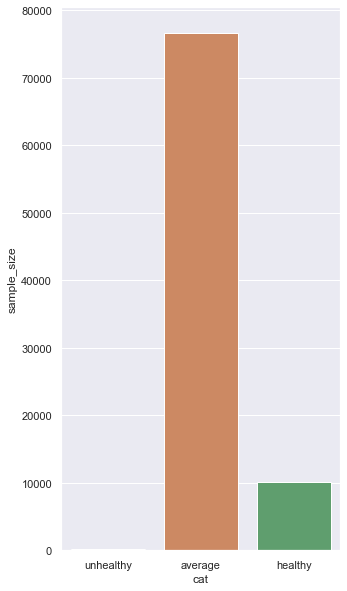

In [356]:
print(df_comp)
sns.set(rc={"figure.figsize":(5, 10)})
sns.barplot(x='cat', y="sample_size", data=df_comp)
